k sources, l rounds (k <= l)

Li: 除去 i - 1 round leaves后剩下的node i<= l
Bi: 距离burned过的nodes为1的nodes

R1 = L1/B1 
...
Rl = Ll/Bl


get matrix, k , l
S0: initialize Ri by Li


In [21]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

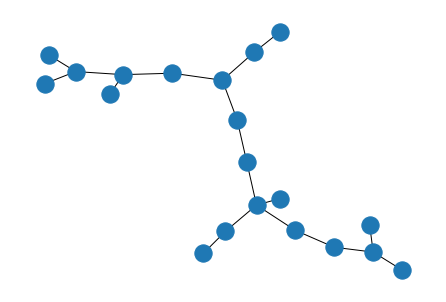

In [2]:
#generate
g = nx.random_tree(20)
# draw 
nx.draw(g, with_labels=False, font_weight='bold')
plt.show()
# to adj matrix
A = nx.adjacency_matrix(g)
A = A.todense()
A = np.array(A)

In [ ]:
'''
input: A, k, l
process:
group1: list LL, ..., L1: set to contain possible sources at round 1, 2, ..., k (LL = RL)
group2: list Rl-1, ..., R1: set to update possiible sources
group3: variable sk, ..., s1: the sequence being burned  
'''
def getSeq(A, k, l):
    #Step1: intial variables
    LL = []
    for i in range(l):
        removeleaves(A, i)
        #make list LL, ..., L1
    #make empty list Rl-1, ..., R1
    '''
    For each round i: 
    1. choose possible source from R_(l+1-i), record it to si, delete it from R_(l+1-i)
    2. update R(l + 1 -(i + 1))
    if number of remained nodes == 0: return True and sequence [s1, s2, ..., si]
    3. skip to i + 1
    '''
    for i in range(k):
        repeat(A, LL)   
        
    #Step2.0:
    if len(LL) == 0:
        return True
    sk = LL[0]
    LL.remove[0]
    
    # Step2.1:
    # update next level
    LLL = burn(A, sk)
    if len(LLL) == 0: #no nodes left 
        return True   #and sequence
    
    skk = LLL[0]
    LLL.remove[0]
    
    '''
    2.2
    ...
    2.k-1
    
    '''
    
    
def removeleaves(A, i):
    for i in range(A.shape[0]):
        if np.count_nonzero(A[i]) == 1:
           A[i] = 0
           A[:, i] = 0         
    return 0 
        
def burn(A, sk):
    #return the nodes whose distance to being burned is <= 1 
    return 0


def repeat(A, L):
    '''
    A: matrix in this round
    L: Nodes - Leaves 
    '''

## 1. remove leaves

In [15]:
def removeleaves(A):
    todelete = []
    for i in range(A.shape[0]):
        if np.count_nonzero(A[i]) == 1:
           todelete.append(i)
           
    for j in range(len(todelete)):
        A[todelete[j]] = 0
        A[:, todelete[j]] = 0         
    return A

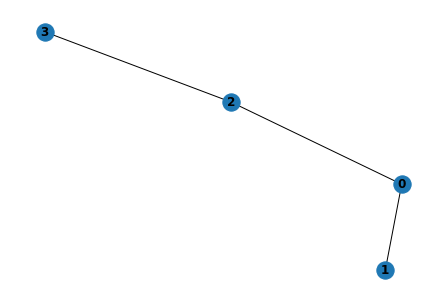

[[0 1 1 0]
 [1 0 0 0]
 [1 0 0 1]
 [0 0 1 0]]
round  0
[[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]]
round  1
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [20]:
##Test remove leaves
g = nx.random_tree(4)
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

A = nx.adjacency_matrix(g)
A = A.todense()
A = np.array(A)

print(A)
for i in range(10):
    if np.sum(A) == 0:
        break
    A = removeleaves(A)
    print("round ", i )
    print(A)
    

## 2. make lists

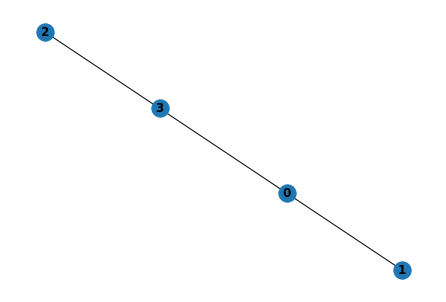

RuntimeError: dictionary changed size during iteration

In [38]:
g = nx.random_tree(4)
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

A = nx.adjacency_matrix(g)
A = A.todense()
A = np.array(A)

N = A.shape[0]
l = 2
L = np.zeros([N,N]) # matrix to store the left node set

L[0] = np.ones([N])

#1
def getLeftSet(A, l, N):
    print(A)
    #remove leaves for l rounds
    for i in range(l):
        if np.sum(A) == 0:
            break
        A = removeleaves(A)
        print(A)
        #update remain nodes 
        for j in range(N):
            if np.count_nonzero(A[j]) != 0:
                print("here")
                L[i+1][j] = 1
#2
def getL(g, i):
    temp = [x for x in g.nodes() if g.degree(x)!=1]
    for j in range(len(temp)):
        L[i+1][temp[j]] = 1
for i in range(l):
    getL(g, i)
    for x in g.nodes():
        if g.degree(x)==1:
            g.remove_node(x)
L

## Another way

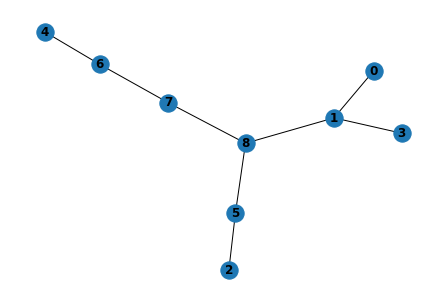

In [24]:
# generate
N = 9
g = nx.random_tree(N)
g_copy = cp.deepcopy(g)
# draw 
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

In [56]:
k = 3
l = 3
#1. list detect whether all nodes are visited
# 0: visited; 1: unvisited 
visited = np.ones([N]) 
#2. N*N matrix: ith row is Li
'''
L_matrix = np.zeros([l+1,N])  
L_matrix[0] = np.ones([N])
'''
L_list = []
notimportant = np.arange(N)
L_list.append(notimportant)
L_list

[array([0, 1, 2, 3, 4, 5, 6, 7, 8])]

# makeLL

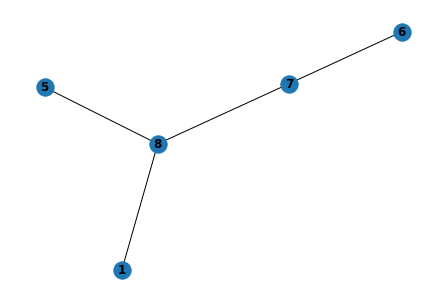

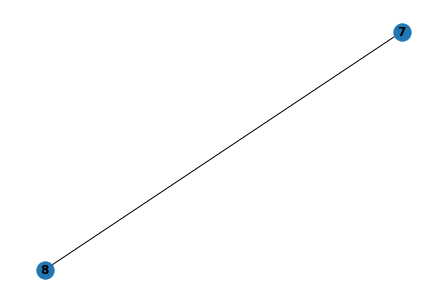

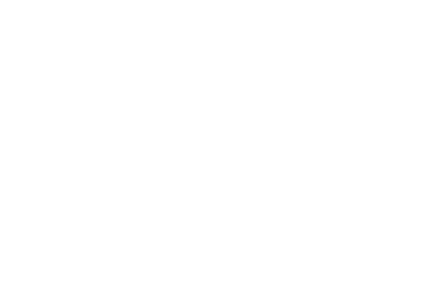

[array([0, 1, 2, 3, 4, 5, 6, 7, 8]), [1, 5, 6, 7, 8], [7, 8], []]

In [58]:
def updateL(input):
    '''
    1. get all leaves
    2. delete all leaves
    '''
    #get all leaves
    temp = [x for x in g.nodes() if g.degree(x)==1]
    #remove leaves from graph
    for i in range(len(temp)):
        g.remove_node(temp[i])
    ''' '''#uncomment to show process graphs
    nx.draw(g, with_labels=True, font_weight='bold')
    plt.show()
    ''' '''
    return [x for x in input if x not in temp]# return all non-leaves; input: rest vertex, 

g = cp.deepcopy(g_copy)
initial = range(N)
for i in range(l):
    leaves = updateL(initial) #get leaves left over
    initial = cp.deepcopy(leaves)
    L_list.append(initial)
    #print(leaves, len(leaves))
    ''' back up plan for L matrix
    for j in range(N):
        if j in leaves:
            #print(i+1, j)
            L_matrix[i+1][j] = 1  
    '''
L_list

## make BB: pick source, burning graph, update R

In [59]:
#initialize R and source
R_list = cp.copy(L_list)
source = -1*np.arange(1, l+2)
source

array([-1, -2, -3, -4])